In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# <a id='7'>Task 1: <a/>
This assignment is for visualization using matplotlib:
data to use:
url= https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv titanic = pd.read_csv(url)
Charts to plot:


In [57]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## [1. Create a pie chart presenting the male/female proportion](#0)

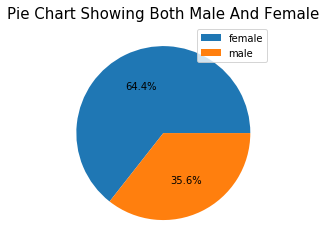

In [58]:
gender = ['female','male']
val = titanic['sex'].value_counts().values.tolist()

fix, ax = plt.subplots()
ax.pie(val, autopct='%1.1f%%')
plt.legend(labels = gender)
plt.title('Pie Chart Showing Both Male And Female' , fontsize = 15)
plt.show()

## [2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender](#0)


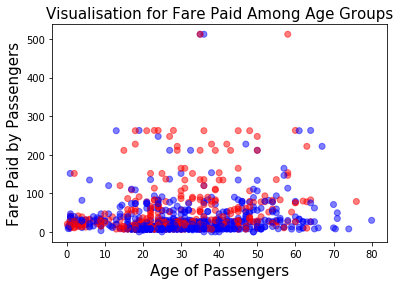

In [70]:
titanic = titanic.dropna(subset=['sex'])

mapper = {'male' : 'blue', 'female' : 'red'}
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, c=titanic['sex'].map(mapper))
plt.title("Visualisation for Fare Paid Among Age Groups" , fontsize=15)
plt.xlabel('Age of Passengers' , fontsize = 15)
plt.ylabel('Fare Paid by Passengers' , fontsize = 15)
plt.show()

# TASK 2

# Scrubbing the data Step by Step

In [2]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN',
'londON_StockhOlm',

'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
'12. Air France', '"Swiss Air"']})

In [3]:
df.head()

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [4]:
# Check shape of df
print(f'Data -  rows :' , df.shape[0] , 'columns :', df.shape[1])

Data -  rows : 5 columns : 4


In [5]:
# Check info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   From_To       5 non-null      object 
 1   FlightNumber  3 non-null      float64
 2   RecentDelays  5 non-null      object 
 3   Airline       5 non-null      object 
dtypes: float64(1), object(3)
memory usage: 288.0+ bytes


In [6]:
# Check for nulls
df.isna().sum()

From_To         0
FlightNumber    2
RecentDelays    0
Airline         0
dtype: int64

In [7]:
# Make a copy of the df for later
df1 = df[:]

## [FlightNumber](#0) :

1. Some values in the the FlightNumber column are missing. These numbers are
meant to increase by 10 with each row so 10055 and 10075 need to be put in
place. Fill in these missing numbers and make the column an integer column
(instead of a float column).

In [8]:
df1['FlightNumber'].iloc[np.where(df1['FlightNumber'].isnull())]  = \
[df1['FlightNumber'][x-1]+10 for x in np.where(df1['FlightNumber'].isnull())]

In [9]:
# Check result
df1.head()

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055.0,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075.0,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [10]:
# Step1 - I decided to replace the "_" with "," for easy manipulation later
df1['From_To'] = df1['From_To'].apply(lambda x : x.replace("_" , ","))

In [11]:
# Check results
df1['From_To']

0        LoNDon,paris
1        MAdrid,miLAN
2    londON,StockhOlm
3      Budapest,PaRis
4     Brussels,londOn
Name: From_To, dtype: object

In [12]:
# Cleaning the Destination Columns
new_col = [col.upper() for col in df['From_To']]
df['From_To'] = new_col

In [13]:
# Check results
df.head()

,From_To,FlightNumber,RecentDelays,Airline
0,"LONDON,PARIS",10045.0,"[23, 47]",KLM(!)
1,"MADRID,MILAN",10055.0,[],<Air France> (12)
2,"LONDON,STOCKHOLM",10065.0,"[24, 43, 87]",(British Airways. )
3,"BUDAPEST,PARIS",10075.0,[13],12. Air France
4,"BRUSSELS,LONDON",10085.0,"[67, 32]","""Swiss Air"""


# <a id='7'>Step 2 -  I create a function to Split the names of the Cities<a/>

In [14]:
def get_city(city_name):
    return city_name.split(',')[1]

In [15]:
df1["Arrival"] = df1['From_To'].apply(lambda x: get_city(x))

In [16]:
df1.head()

,From_To,FlightNumber,RecentDelays,Airline,Arrival
0,"LONDON,PARIS",10045.0,"[23, 47]",KLM(!),PARIS
1,"MADRID,MILAN",10055.0,[],<Air France> (12),MILAN
2,"LONDON,STOCKHOLM",10065.0,"[24, 43, 87]",(British Airways. ),STOCKHOLM
3,"BUDAPEST,PARIS",10075.0,[13],12. Air France,PARIS
4,"BRUSSELS,LONDON",10085.0,"[67, 32]","""Swiss Air""",LONDON


In [17]:
# Split the cities from the column
df1['From_To'] = df1['From_To'].apply(lambda x: x.split(",")[0].split('/')[0])

In [18]:
# Check result
df1.head()

,From_To,FlightNumber,RecentDelays,Airline,Arrival
0,LONDON,10045.0,"[23, 47]",KLM(!),PARIS
1,MADRID,10055.0,[],<Air France> (12),MILAN
2,LONDON,10065.0,"[24, 43, 87]",(British Airways. ),STOCKHOLM
3,BUDAPEST,10075.0,[13],12. Air France,PARIS
4,BRUSSELS,10085.0,"[67, 32]","""Swiss Air""",LONDON


### [From_To Column](#0)
3. Notice how the capitalisation of the city names is all mixed up in this
temporary DataFrame. Standardise the strings so that only the first letter is
uppercase (e.g. "londON" should become "London".)

In [19]:
# df1 = df.copy()

In [20]:
new_1 = [col.capitalize() for col in df1['From_To']]
df1['From_To'] = new_1

In [21]:
new_2 = [col.capitalize() for col in df1['Arrival']]
df1['Arrival'] = new_2

In [22]:
# Check results
df1

,From_To,FlightNumber,RecentDelays,Airline,Arrival
0,London,10045.0,"[23, 47]",KLM(!),Paris
1,Madrid,10055.0,[],<Air France> (12),Milan
2,London,10065.0,"[24, 43, 87]",(British Airways. ),Stockholm
3,Budapest,10075.0,[13],12. Air France,Paris
4,Brussels,10085.0,"[67, 32]","""Swiss Air""",London


### [Rename the columns](#0)

In [23]:
df1.rename(columns = {'From_To' : 'Departure' } , inplace = True)

# <a id='7'>Cleaning The Airline Column<a/>

In [24]:
# Lets check the airline column to see what we are dealing with here
df1['Airline'] 

0                 KLM(!)
1      <Air France> (12)
2    (British Airways. )
3         12. Air France
4            "Swiss Air"
Name: Airline, dtype: object

In [25]:
col = ['Airline']
df1[col]=df1[col].replace({'$':'','(!)':"",'<':"",'>':"",'( )':"",'12.':"",' ':"",'""':"","": "",' (12)':"","()":""}
                          ,regex = True)


In [26]:
df1['Airline'] = df1['Airline'].apply(lambda x : x.strip('()'))

In [27]:
df1['Airline'] = df1['Airline'].apply(lambda x : x.strip('.'))

In [28]:
df1['Airline'][4] = 'SwissAir'

In [29]:
# Check results
df1.head()

,Departure,FlightNumber,RecentDelays,Airline,Arrival
0,London,10045.0,"[23, 47]",KLM,Paris
1,Madrid,10055.0,[],AirFrance,Milan
2,London,10065.0,"[24, 43, 87]",BritishAirways,Stockholm
3,Budapest,10075.0,[13],AirFrance,Paris
4,Brussels,10085.0,"[67, 32]",SwissAir,London


5. In the RecentDelays column, the values have been entered into the
DataFrame as a list. We would like each first value in its own column, each

second value in its own column, and so on. If there isn't an Nth value, the value
should be NaN.
Expand the Series of lists into a DataFrame named delays, rename the columns
delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df
with delays.


In [31]:
df2 = pd.DataFrame(df1['RecentDelays'].values.tolist())
df2

,0,1,2
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


### [Rename the columns](#0)

In [32]:
try:
    df2.rename(columns = {0:'Delays_1', 1:'Delays_2', 2:'Delays_3'} , inplace = True)
    
except Exception as x:
    pass

In [33]:
# Check results
df2

,Delays_1,Delays_2,Delays_3
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [34]:
df1[['Delays_1','Delays_2','Delays_3']] = df2[['Delays_1','Delays_2','Delays_3']]

In [35]:
df1

,Departure,FlightNumber,RecentDelays,Airline,Arrival,Delays_1,Delays_2,Delays_3
0,London,10045.0,"[23, 47]",KLM,Paris,23.0,47.0,NaN
1,Madrid,10055.0,[],AirFrance,Milan,NaN,NaN,NaN
2,London,10065.0,"[24, 43, 87]",BritishAirways,Stockholm,24.0,43.0,87.0
3,Budapest,10075.0,[13],AirFrance,Paris,13.0,NaN,NaN
4,Brussels,10085.0,"[67, 32]",SwissAir,London,67.0,32.0,NaN


# <a id='7'># Finally lets drop the RecentDelays Columns<a/>

In [36]:
df1.drop('RecentDelays' , 1, inplace = True)

In [37]:
df1

,Departure,FlightNumber,Airline,Arrival,Delays_1,Delays_2,Delays_3
0,London,10045.0,KLM,Paris,23.0,47.0,NaN
1,Madrid,10055.0,AirFrance,Milan,NaN,NaN,NaN
2,London,10065.0,BritishAirways,Stockholm,24.0,43.0,87.0
3,Budapest,10075.0,AirFrance,Paris,13.0,NaN,NaN
4,Brussels,10085.0,SwissAir,London,67.0,32.0,NaN


# Note from here we can decide to drop the NAn values or fill them with zero or with the mean or median